In [17]:
import ps_utils
import os
from skimage.io import imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
path = r''
filename ='shiny_vase2'

In [19]:
I_vase, mask_vase, S_vase = ps_utils.read_data_file(os.path.join(path,filename))

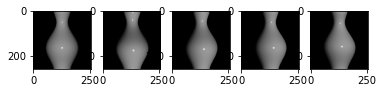

In [25]:
# show the first 5 images of the vase
fig, axes = plt.subplots(1, 5)
ax = axes.ravel()

for i in range(5):
    ax[i].imshow(I_vase[:,:,i],cmap = 'Greys_r');


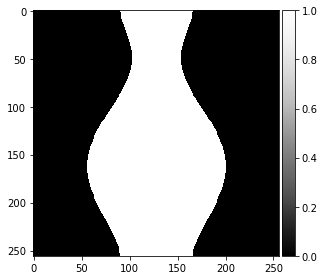

In [8]:
# show what is masked
imshow(mask_vase, cmap = 'Greys_r');

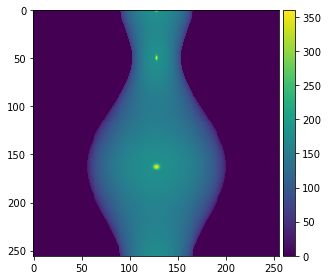

In [28]:
# show vase clipped with the mask
imshow(mask_vase * I_vase[:,:,0]);

In [12]:
mask_vase_new = 1 - mask_vase # take 1-mask so that the vase is shown and not the background

In [36]:
J = np.ndarray((22,mask_vase.sum())) # create nd array sum() to get the amount of non-zero cells

for i in range(I_vase.shape[2]):
    masked_I_vase = np.ma.masked_array(I_vase[:,:,i], mask=mask_vase_new)
    compressed_I_vase = masked_I_vase.compressed()
    J[i] = compressed_I_vase


In [37]:
J.shape

(22, 24828)

In [40]:
# get M= S^-1 J
print(S_vase.shape)
S_vase_inv = np.linalg.pinv(S_vase)
M = S_vase_inv @J

(22, 3)


In [41]:
M.shape

(3, 24828)

In [42]:
# With it(M), extract the albedo
# within the mask, display it as a 2D image.

In [43]:
# calculate albedo
norm_M_vase = np.linalg.norm(M, axis = 0)
norm_M_vase.shape
albedo_vase = norm_M_vase

In [44]:
mask_vase.shape

(256, 256)

In [45]:
# convert back to image
# inspired by https://stackoverflow.com/questions/38855058/inverting-the-numpy-ma-compressed-operation
albedo_image_vase = np.ndarray(mask_vase.shape)
np.place(albedo_image_vase,masked_I_vase.mask,0)
np.place(albedo_image_vase,~masked_I_vase.mask,albedo_vase)

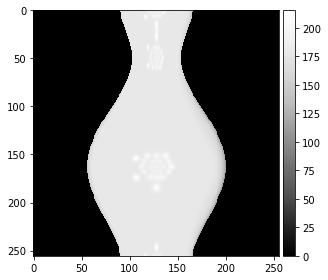

In [47]:
# display the albedo 
imshow(albedo_image_vase,cmap = 'Greys_r');

In [48]:
# CALCULATE normal
normal = (1/albedo_vase)*M

In [49]:
normal.shape

(3, 24828)

In [50]:
n1,n2,n3 = normal #unpack to seperate variables

In [51]:
# convert back to 256x256 array
# inspired by https://stackoverflow.com/questions/38855058/inverting-the-numpy-ma-compressed-operation
norm1 = np.ndarray(mask_vase.shape)
np.place(norm1,masked_I_vase.mask,0)
np.place(norm1,~masked_I_vase.mask,n1)


In [52]:
norm2 = np.ndarray(mask_vase.shape)
np.place(norm2,masked_I_vase.mask,0)
np.place(norm2,~masked_I_vase.mask,n2)

In [53]:
norm3 = np.ndarray(mask_vase.shape)
np.place(norm3,masked_I_vase.mask,0)
np.place(norm3,~masked_I_vase.mask,n3)

In [54]:
norm1.shape,norm2.shape,norm3.shape

((256, 256), (256, 256), (256, 256))

In [55]:
z_vase = ps_utils.simchony_integrate(norm1,norm2,norm3, mask_vase)

/Users/nell/Downloads/vision-and-image-processing-main 2/vip3/ps_utils.py:519: RuntimeWarning: invalid value encountered in true_divide
  p = -n2/n3
/Users/nell/Downloads/vision-and-image-processing-main 2/vip3/ps_utils.py:520: RuntimeWarning: invalid value encountered in true_divide
  q = -n1/n3
/Users/nell/Downloads/vision-and-image-processing-main 2/vip3/ps_utils.py:550: RuntimeWarning: divide by zero encountered in true_divide
  Z = fs/denum


In [ ]:
ps_utils.display_surface(z_vase, albedo=None)